# 10/05 - Pair Programming Limpieza 1 - Guadalupe & Lara

In [21]:
import pandas as pd
import seaborn as sns
import numpy as np
import re
import matplotlib.pyplot as plt
pd.options.display.max_columns = None
df = df = pd.read_csv("ataques_enproceso_2.csv", index_col = 0)

In [22]:
df.head()

,case_number,year,type,country,area,location,activity,name,sex_,age,time,species_,fatal_(y/n),injury,date
0,2018.06.25,2018.0,Boating,usa,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,18h00,white_shark,N,"No injury to occupant, outrigger canoe and pad...",25-Jun-2018
1,2018.06.18,2018.0,Unprovoked,usa,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,14h00 -15h00,unspecified,N,Minor injury to left thigh,18-Jun-2018
2,2018.06.09,2018.0,Invalid,usa,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,07h45,unspecified,N,Injury to left lower leg from surfboard skeg,09-Jun-2018
3,2018.06.08,2018.0,Unprovoked,australia,New South Wales,Arrawarra Headland,Surfing,male,M,NaN,NaN,unspecified,N,Minor injury to lower leg,08-Jun-2018
4,2018.06.04,2018.0,Provoked,mexico,Colima,La Ticla,Free diving,Gustavo Ramos,M,NaN,NaN,tiger_shark,N,Lacerations to leg & hand shark PROVOKED INCIDENT,04-Jun-2018


In [23]:
df.shape

(6288, 15)

Por lo tanto, en este ejercicio tendremos que limpiar los outliers.

-*¿Sobre que columnas podremos eliminar o reemplazar los outliers?*



In [24]:
df_numericas = df.select_dtypes(include=np.number)
df_numericas.head(2)

,year
0,2018.0
1,2018.0


-*Identifica visualmente los outlier.*



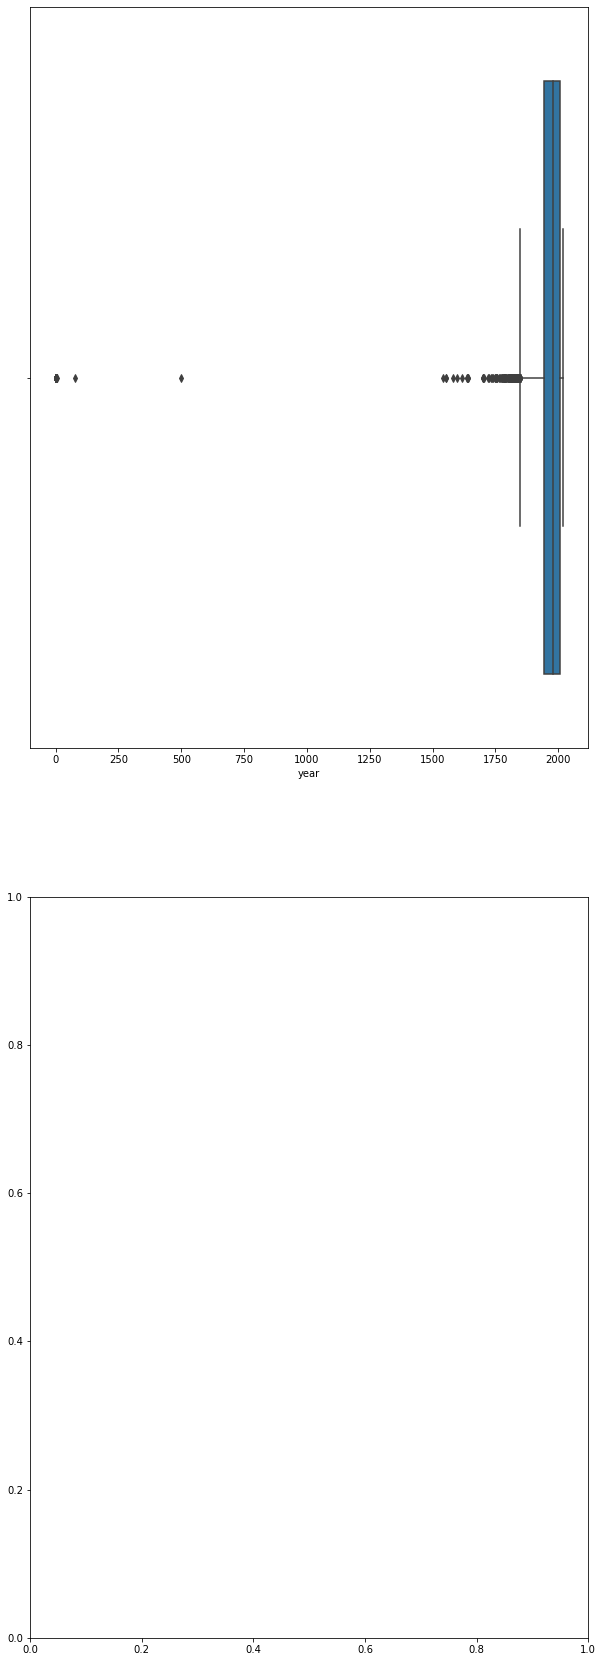

In [25]:
# Tenemos 2 columnas, que prodrían ser 3 cuando completemos "new_age"
fig, ax = plt.subplots(2, 1, figsize=(10,30))
0
for i in range(len(df_numericas.columns)):
    sns.boxplot(x=df_numericas.columns[i], data=df_numericas, ax=ax[i])
plt.show()

-*Identifica sobre el dataframe las filas que son outliers*


In [26]:
Q1 = np.nanpercentile(df['year'], 25)
Q1

1942.0

In [27]:
# cálculo del Q3
Q3 = np.nanpercentile(df['year'], 75)
Q3

2005.0

In [28]:
#calculemos el IQR 

IQR = Q3 - Q1
IQR

63.0

In [29]:
# multiplicamos el IQR por 1.5

outlier_step = 1.5 * IQR
outlier_step

94.5

In [30]:
outliers_data = df[(df["year"] < Q1 - outlier_step) | (df["year"] > Q3 + outlier_step)]
outliers_data.head(10)

,case_number,year,type,country,area,location,activity,name,sex_,age,time,species_,fatal_(y/n),injury,date
6022,1847.11.30,1847.0,Unprovoked,australia,Queensland,Brisbane River,Swimming,James Stewart,M,NaN,NaN,unspecified,N,Thigh & calf bitten,30-Nov-1847
6023,1847.09.10,1847.0,Unprovoked,usa,Massachusetts,"Chelsea Beach, Suffolk County",Wading,Amos Thompson,M,NaN,NaN,unspecified,N,Lacerations to arm,10-Sep-1847
6024,1847.07.19,1847.0,Unprovoked,greece,Corfu,Off the harbor wall at Mandrakina,Swimming,"William Mills, a British solider, 36th Regiment",M,19,NaN,unspecified,Y,FATAL,19-Jul-1847
6025,1847.07.03.R,1847.0,Unprovoked,usa,Hawaii,NaN,Hilo,Diving,M,NaN,NaN,unspecified,N,Head & arm bitten,Reported 03-Jul-1847
6026,1847.03.11,1847.0,Sea Disaster,australia,Queensland,Moreton Bay,Wreck of the Sovereign,Spicer,M,NaN,NaN,unspecified,N,Foot severed,11-Mar-1847
6027,1847.02.12,1847.0,Sea Disaster,mexico,NaN,NaN,Wreck of the Tweed,NaN,NaN,NaN,NaN,unspecified,Y,FATAL,12-Feb-1847
6028,1847.00.00.c,1847.0,Unprovoked,australia,Queensland,Moreton Bay,NaN,a native,NaN,NaN,NaN,unspecified,N,Foot severed at ankle joint,Reported in 1847
6029,1847.00.00.b,1847.0,Invalid,usa,South Carolina,"Charleston Harbor, Charleston County",Swimming,a young sailor,M,NaN,NaN,unspecified,NaN,"Disappeared, thought to have been taken by a s...",1847
6030,1847.00.00.a,1847.0,Unprovoked,usa,South Carolina,NaN,Boating,adult,M,NaN,NaN,unspecified,N,Hand severed,Ca. 1847
6031,1846.12.08,1846.0,Sea Disaster,mexico,Veracruz,Vera Cruz,Wreck of the USS Somers,NaN,M,NaN,NaN,unspecified,Y,"FATAL, some were taken by sharks",08-Dec-1846


In [31]:
Q1 = np.nanpercentile(df['year'], 25)
Q3 = np.nanpercentile(df['year'], 75)
IQR = Q3 - Q1
outlier_step = 1.5 * IQR
outliers_data = df[(df["year"] < Q1 - outlier_step) | (df["year"] > Q3 + outlier_step)]
outliers_data.head(2)


,case_number,year,type,country,area,location,activity,name,sex_,age,time,species_,fatal_(y/n),injury,date
6022,1847.11.30,1847.0,Unprovoked,australia,Queensland,Brisbane River,Swimming,James Stewart,M,NaN,NaN,unspecified,N,Thigh & calf bitten,30-Nov-1847
6023,1847.09.10,1847.0,Unprovoked,usa,Massachusetts,"Chelsea Beach, Suffolk County",Wading,Amos Thompson,M,NaN,NaN,unspecified,N,Lacerations to arm,10-Sep-1847


In [32]:
outliers_data.shape

(261, 15)

In [33]:
# sacamos los índices de los outliers 
lista_out = list(outliers_data.index)
lista_out 

[6022,
 6023,
 6024,
 6025,
 6026,
 6027,
 6028,
 6029,
 6030,
 6031,
 6032,
 6033,
 6034,
 6035,
 6036,
 6037,
 6038,
 6039,
 6040,
 6041,
 6042,
 6043,
 6044,
 6045,
 6046,
 6047,
 6048,
 6049,
 6050,
 6051,
 6052,
 6053,
 6054,
 6055,
 6056,
 6057,
 6058,
 6059,
 6060,
 6061,
 6062,
 6063,
 6064,
 6065,
 6066,
 6067,
 6068,
 6069,
 6070,
 6071,
 6072,
 6073,
 6074,
 6075,
 6076,
 6077,
 6078,
 6079,
 6080,
 6081,
 6082,
 6083,
 6084,
 6085,
 6086,
 6087,
 6088,
 6089,
 6090,
 6091,
 6092,
 6093,
 6094,
 6095,
 6096,
 6097,
 6098,
 6099,
 6100,
 6101,
 6102,
 6103,
 6104,
 6105,
 6106,
 6108,
 6109,
 6110,
 6111,
 6112,
 6113,
 6114,
 6115,
 6116,
 6117,
 6118,
 6119,
 6120,
 6121,
 6122,
 6123,
 6124,
 6125,
 6126,
 6127,
 6128,
 6129,
 6130,
 6131,
 6132,
 6133,
 6134,
 6135,
 6136,
 6137,
 6138,
 6139,
 6140,
 6141,
 6142,
 6143,
 6144,
 6145,
 6146,
 6147,
 6148,
 6149,
 6150,
 6151,
 6152,
 6153,
 6154,
 6155,
 6156,
 6157,
 6158,
 6159,
 6160,
 6161,
 6162,
 6163,
 6164,
 6165,

In [34]:
#Funcion para cuando podamos usar "new age"
# def detectar_outliers(lista_columnas, dataframe): 
    
#     dicc_indices = {} # creamos un diccionario donde almacenaremos índices de los outliers
    
#     # iteramos por la lista de las columnas numéricas de nuestro dataframe
#     for col in lista_columnas:
        
#         #calculamos los cuartiles Q1 y Q3
#         Q1 = np.nanpercentile(df[col], 25)
#         Q3 = np.nanpercentile(df[col], 75)
        
#         # calculamos el rango intercuartil
#         IQR = Q3 - Q1
        
#         # calculamos los límites
#         outlier_step = 1.5 * IQR
        
#         # filtramos nuestro dataframe para indentificar los outliers
#         outliers_data = dataframe[(dataframe[col] < Q1 - outlier_step) | (dataframe[col] > Q3 + outlier_step)]
        
        
#         if outliers_data.shape[0] > 0: # chequeamos si nuestro dataframe tiene alguna fila. 
        
#             dicc_indices[col] = (list(outliers_data.index)) # si tiene fila es que hay outliers y por lo tanto lo añadimos a nuestro diccionario
        

    
#     return dicc_indices 

In [35]:
df

,case_number,year,type,country,area,location,activity,name,sex_,age,time,species_,fatal_(y/n),injury,date
0,2018.06.25,2018.0,Boating,usa,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,18h00,white_shark,N,"No injury to occupant, outrigger canoe and pad...",25-Jun-2018
1,2018.06.18,2018.0,Unprovoked,usa,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,14h00 -15h00,unspecified,N,Minor injury to left thigh,18-Jun-2018
2,2018.06.09,2018.0,Invalid,usa,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,07h45,unspecified,N,Injury to left lower leg from surfboard skeg,09-Jun-2018
3,2018.06.08,2018.0,Unprovoked,australia,New South Wales,Arrawarra Headland,Surfing,male,M,NaN,NaN,unspecified,N,Minor injury to lower leg,08-Jun-2018
4,2018.06.04,2018.0,Provoked,mexico,Colima,La Ticla,Free diving,Gustavo Ramos,M,NaN,NaN,tiger_shark,N,Lacerations to leg & hand shark PROVOKED INCIDENT,04-Jun-2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6283,ND.0001,0.0,Unprovoked,ceylon (sri lanka),Eastern Province,"Below the English fort, Trincomalee",Swimming,male,M,15,NaN,unspecified,Y,"FATAL. ""Shark bit him in half, carrying away t...",1845-1853
6284,2017.01.08.R,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,unspecified,NaN,"No attack, shark made a threat display",Reported 08-Jan-2017
6285,1836.08.19.R,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,unspecified,Y,FATAL,Reported 19-Aug-1836
6286,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,unspecified,NaN,NaN,NaN


In [36]:
# aplicamos la función y sacamos los índices de los outliers.

# ind = detectar_outliers(lista_columnas, df)

-*Reemplaza los outliers por el estadístico más correcto.*

-*Guarda el csv con las columnas limpias para seguir trabajando con este dataframe limpio.*

In [38]:
df.to_csv("ataques_enproceso3.csv")